In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_excel('pima-data.xlsx')
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [4]:
df.shape

(768, 12)

In [5]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

<!-- step 2 cleaning the data
a.finding the null values -->

## step 2 cleaning the data
## a.finding the null values

In [6]:
df.isnull().values.any()

np.False_

In [7]:
df.isnull().values.sum()

np.int64(0)

## remove dupliacte columns

In [8]:
import matplotlib.pyplot as plt
def plot_corr(df,size=10):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
    plt.yticks(range(len(corr.columns)),corr.columns)


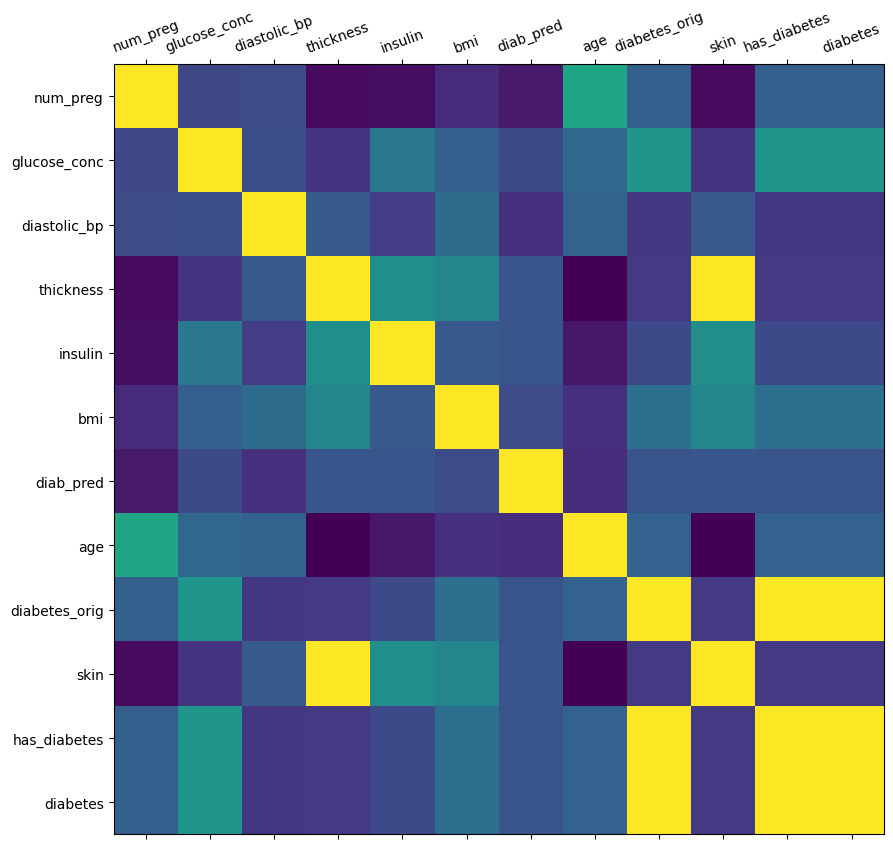

In [9]:
plot_corr(df)

In [10]:
df.head()
df.tail()
df.describe()
df.size

9216

## correlated columns
## thickness and skin are correlated to each other
## diabetes_origin and has_diabetes are correlated to each other
## diabetes_origin and diabetes are correlated to each other
## has_diabetes and diabetes are correlated to each other

# 3. drop the correlated columns

In [12]:
df.drop('thickness',axis=1,inplace=True)
df.drop('has_diabetes',axis=1,inplace=True)
df.drop('diabetes_orig',axis=1,inplace=True)


In [13]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,False
764,2,122,70,0,36.8,0.340,27,1.0638,False
765,5,121,72,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,30.1,0.349,47,0.0000,True


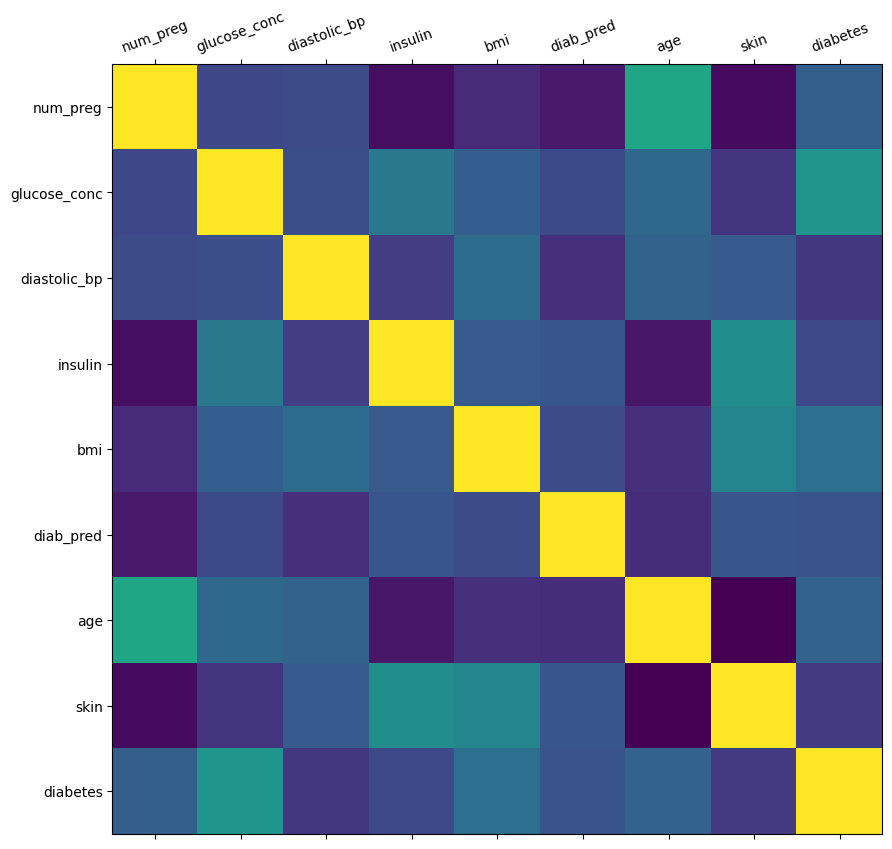

In [14]:
plot_corr(df)

## convert text to integer

In [16]:
dict1={ 'diabetes' : [True,False] }
dict2 = { 'diabetes' : [1,0 ] }


In [17]:
df.replace(dict1,dict2,inplace=True)

C:\Users\LENOVO V330\AppData\Local\Temp\ipykernel_328\3065561261.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(dict1,dict2,inplace=True)


In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [19]:
num_true=len(df.loc[df['diabetes'] == 1 ])
num_false=len(df.loc[df['diabetes'] == 0 ])

print(f"num_true=={num_true}")
print(f"num_flase=={num_false}")

per_num_true = (num_true / (num_true + num_false ))* 100
print(per_num_true)


per_num_false = (num_false / (num_true + num_false ))* 100
print(per_num_false)


num_true==268
num_flase==500
34.89583333333333
65.10416666666666


In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.model_selection import train_test_split

input_columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
output_columns=['diabetes']

x=df[input_columns].values
y=df[output_columns].values

# print(x)  input columns data
# print(y) output weather 1 or 0

split_test_size=0.3 #we are training the data with 30 percentage 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = split_test_size , random_state = 42 )

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


In [24]:
print('{0:02f}% in training set ' . format((len(x_train)/len(df.index))*100))
print('{0:02f}% in training set ' . format((len(x_test)/len(df.index))*100))

69.921875% in training set 
30.078125% in training set 


# step 4 post split preparation 

In [25]:
total_num_preg = len(df.loc[df['num_preg'] == 0 ])
print(f" number of rows missing in num_preg is {total_num_preg}")

total_glucose_conc = len(df.loc[df['glucose_conc'] == 0 ])
print(f" number of rows missing in glucose_conc is {total_glucose_conc}")

total_diastolic_bp = len(df.loc[df['diastolic_bp'] == 0 ])
print(f" number of rows missing in diastolic_bp is {total_diastolic_bp}")

total_insulin = len(df.loc[df['insulin'] == 0 ])
print(f" number of rows missing in insulin is {total_insulin}")

total_bmi = len(df.loc[df['bmi'] == 0 ])
print(f" number of rows missing in bmi is {total_bmi}")

total_diab_pred = len(df.loc[df['diab_pred'] == 0 ])
print(f" number of rows missing in diab_pred is {total_diab_pred}")

total_age = len(df.loc[df['age'] == 0 ])
print(f" number of rows missing in age is {total_age}")


total_skin = len(df.loc[df['skin'] == 0 ])
print(f" number of rows missing in skin is {total_skin}")




 number of rows missing in num_preg is 111
 number of rows missing in glucose_conc is 5
 number of rows missing in diastolic_bp is 35
 number of rows missing in insulin is 374
 number of rows missing in bmi is 11
 number of rows missing in diab_pred is 0
 number of rows missing in age is 0
 number of rows missing in skin is 227


In [26]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values = 0 , strategy='mean')
x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [27]:
x_train[0:3]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00]])


# standardise the data


In [28]:
#from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)



In [29]:
x_train[:3]

array([[-1.15687814e+00, -8.96200501e-01, -1.00392807e+00,
        -1.14563966e+00, -1.20379368e+00, -6.14216360e-01,
        -9.48610283e-01, -1.25782829e+00],
       [ 2.28370750e-01, -5.64089421e-01, -1.97904130e-02,
         1.99702256e+00,  6.64529988e-01, -9.09737865e-01,
        -4.34666726e-01,  4.16397301e-02],
       [ 6.15174086e-16,  4.32243819e-01, -3.47836300e-01,
         1.11425228e+00,  1.44060290e+00, -3.06991033e-01,
        -7.77295764e-01,  1.57737467e+00]])

# training the model using naive bayes algorithm

In [30]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())

GaussianNB()

# import metrics for finding accuracy

In [31]:
from sklearn import metrics
nb_predict_model=nb_model.predict(x_train)
print(f'predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}')


predicted accuracy 0.7541899441340782


In [32]:
nb_predict_test=nb_model.predict(x_test)
print(f'predicted accuracy {metrics.accuracy_score(y_test,nb_predict_test)}')


predicted accuracy 0.7532467532467533


In [33]:
print(f'{metrics.confusion_matrix(y_test,nb_predict_test)}') 

[[123  28]
 [ 29  51]]


In [34]:
# how you know whether accuracy given by accuracy_score is correct or not 

# 1 by using confusion matrix
# 2 by using classification report

In [35]:
print("Classification_report")
print(f'{metrics.classification_report(y_test,nb_predict_test)}') 

Classification_report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231

